Analyzing Metadata of News Articles.

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import re
from datetime import datetime
import datetime as dt


 Today's NEWS  2010-06-01 00:00:00 

0     2010-06-01T12:29:02-0700
1     2010-06-01T12:54:30-0700
2     2010-06-01T09:55:44-0700
3     2010-06-01T12:12:05-0700
4     2010-06-01T09:19:17-0700
                ...           
58    2010-05-28T11:35:21-0700
59    2010-05-28T15:16:00-0700
60    2010-05-28T08:56:28-0700
61    2010-05-28T06:15:10-0700
62    2010-05-28T06:10:03-0700
Name: Date, Length: 63, dtype: object


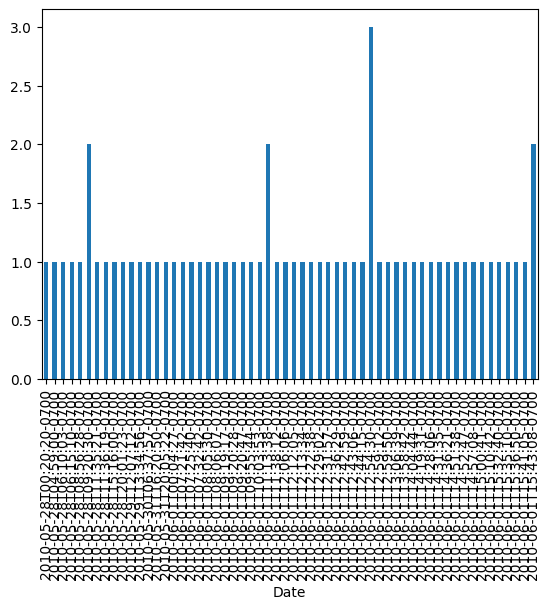


 Today's NEWS  2010-06-02 00:00:00 

0     2010-06-02T18:24:02-0700
1     2010-06-02T18:37:53-0700
2     2010-06-02T19:14:09-0700
3     2010-06-02T13:56:58-0700
4     2010-06-02T18:24:15-0700
                ...           
58    2010-06-01T09:20:47-0700
59    2010-06-02T09:44:08-0700
60    2010-06-02T08:50:00-0700
61    2010-06-02T06:40:17-0700
62    2010-06-02T06:35:04-0700
Name: Date, Length: 63, dtype: object


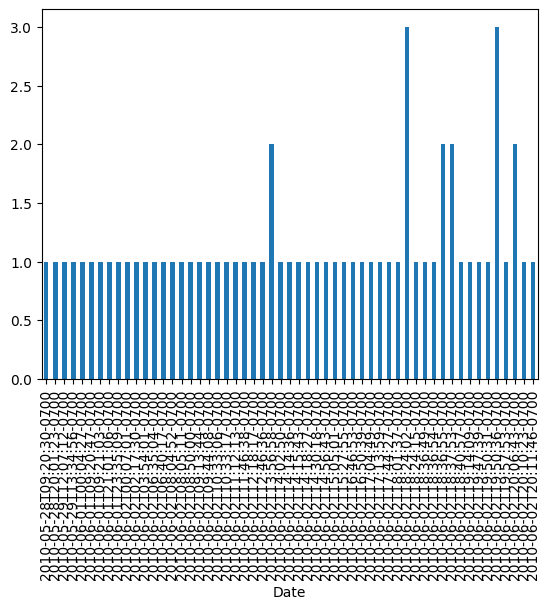

In [16]:


# Define the start time and end time
start_time = datetime(2010, 6, 1)  # 2022-02-01 00:00:00
end_time = datetime(2010, 6, 2)  # 2022-02-28 23:59:59

# Define the time step between datetimes (1 day in this example)
time_step = dt.timedelta(days=1)

# Generate a list of datetimes between the start time and end time
current_time = start_time



while current_time <= end_time:
    
    # Format the date as a string in YYYY-MM-DD format
    date_str = current_time.strftime('%Y%m%d')

    # Create a regular expression pattern to match the URL
    pattern = f"https://web.archive.org/web/{date_str}.*/https://news.yahoo.com"
    
    response = requests.get(pattern)
    soup = BeautifulSoup(response.content, 'lxml')

    #print(soup.prettify())

    #headline_links = soup.find_all('a', class_=['showtt', 'yltasis'])

    result = []
    headlines = []
    dates = []
    urls = []
    
    headline_links = soup.find_all('li')
    #print(headline_links)

    for link in headline_links:

        headline = link.find('a', class_=['showtt', 'yltasis'])
        time_stamp = link.find('abbr')

        if time_stamp and headline  is not None : 
            result.append( [ headline.get_text().strip() , time_stamp.get('title') , headline.get('href') ] )
            headlines.append( headline.get_text().strip() )
            dates.append( time_stamp.get('title') )
            urls.append( headline.get('href') )

    
    
    print("\n Today's NEWS ", current_time ,'\n')
    #print(result)
    #print(headlines , dates, urls)
    
    data = {
        "Headline": headlines,
        "Date": dates,
        "URL": urls
        }

    df = pd.DataFrame(data)
    print(df['Date'])

    articles_by_date = df.groupby("Date").count()["Headline"]
    
    articles_by_date.plot(kind="bar")
    plt.show()







    current_time += time_step    






In [46]:
import itertools

for link, abbr_tag in zip(itertools.islice(headline_links, 2, None), abbr_content):
    
    if abbr_tag is not None:
        
        result.append([link.get_text().strip(), abbr_tag.get('title')])

                       
